# Overview
The health inspection scores for different restaurants were collected and grouped into two sections: chain restaurants and non-chain restaurants. The scores were then plotted into histograms with each group and were measured against eachother to determine the higher average score per location as well as the highest grouping of scores. The average of the chain restaurant scores and the average of non-chain restaurant scores were compared against eachother as well as the average scores by location.
The end result is that there was a slightly higher average score as well as a higher average location score in the chain restaurants vs. the non-chain restaurants.
# Name & Github ID
+ Name: Kyle Sasagawa 
+ Github Username: ksasagaw

# Research Question
Is there a significant difference between the food inspection scores of chain restaurants vs. non-chain restaurants?

# Background & Prior Work
Food health and safety inspections are a mandatory set of 1-4 annual inspections conducted by a trained health inspector. This health inspector follows a locally or state sourced set of guidelines to assign the restaurant a score, letter grade, or both. A score of 90 or higher, or an 'A', allows for the restaurant to have a few low risk violations or one high risk violation. This score drops from 100 as the number of violations increases. Chain restuarants typically will have a set of company-wide health guidelines and will sometimes have company health inspections. For instance, McDonalds recently had the BRC review their food safety system and highlight possible weakeness in the corporation's food handling practices. It has been noted before that the health practices of specific chain restaurants is dependant on the managers and staff of the local branches, The Oklahoman noted that most chain restaurants scored well on their inspections, but a few locations had an extreme number of violations.

In a study done on chain vs. non-chain restaurants in Phildelphia in 2013-14, chain restaurants had significantly fewer health violations per inspections. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/) The study also noted that as the number of inspections increased, the number of violations per inspection for non-chain restaurants went down as opposed to chain restaurants which had no noticable changes. It is also worth noting that the number of inspections per year often depends on the type of food being served as well as the restaurant's health inspection history which can change the performance of non-chain restaurants as stated in the study.
References:
+ 1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/
+ 2) https://corporate.mcdonalds.com/corpmcd/our-purpose-and-impact/food-quality-and-sourcing/food-safety.html

# Hypothesis
I believe that chain restaurants will have generally higher scores than those of non-chain restaurants. I believe a wide set of corporate standards for food safety as well as an optimized workflow to promote food safety should return more positive health inspection scores. Chain burger restaurants often customize their workspaces to ensure that raw meat surfaces will never come into contact with anything but raw meat, ensuring that the employee does not have to remember to wash the surface before putting anything on it. Tactics such as these often account for employee error and minimize accidential health risks.
# Datasets
The restaurants and inspection datasets were used. The restaurants dataset was used to retrieve the names and corresponding hsisid of the listed establisments. The inspections dataset included the hsisid and the health inspection score of the establisment for each inspection it went through. The datasets will be merged along the hsisid column to create a list of inspections for each location as well as the name of the establishment. 
+ Dataset Name: Inspections
+ Link to the dataset:https://github.com/COGS108/individual_fa20/tree/master/data
+ Number of observations:21109


+ Dataset Name: Restaurants
+ Link to the dataset:https://github.com/COGS108/individual_fa20/tree/master/data
+ Number of observations:3325

# Setup

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import numpy as np

# Data Cleaning

In [2]:
inspections = pd.read_csv('inspections.csv')
restaurants = pd.read_csv('restaurants.csv')

restaurants = restaurants[['hsisid', 'name']][restaurants['facilitytype'] == 'Restaurant'] #Remove all non-restaurant establisments
inspections = inspections[['hsisid', 'score', 'num_critical', 'num_non_critical', 'date']]

combined = pd.merge(inspections, restaurants, how = 'outer', on  = 'hsisid') #Merge to one dataframe
combined = combined[combined['score'].notna()][combined['name'].notna()] #Remove null rows

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [3]:
#Collect a set containing the names of the chain restaurants as well as non-chain restaurants
names_set = set()
chain_set = set()
for idx, data in restaurants.iterrows():
    name = data['name']
    name = name.upper()
    name = ''.join(i for i in name if not i.isdigit())
    name = name.replace('TARGET', '')
    name = name.replace('WALMART', '')
    name = name.split('OF')[0]
    name = name.split('AT')[0]
    name = name.translate(str.maketrans('', '', string.punctuation))
    name = name.replace('  ', ' ')
    name = name.strip()
    #If the location appears more than once, add it to the chain restaurants set
    if(name not in names_set):
        names_set.add(name)
    else:
        chain_set.add(name)
#Add any edge chain restaurants that were not caught by the above
chain_set.update(('NOODLES COMPANY', 'CRACKER BARREL', 'DAIRY QUEEN ORANGE JULIUS', 'JERSEY MIKES A', 'STARBUCKS NORTH HILLS CENTER','KFC','DENNYS RESTAURANT','FIVE GUYS BURGERS FRIES','PANDA EXPRESS','CHUCK E CHEESE','FIVE GUYS BURGERS AMP FRIES NC','STARBUCKS PRESECURITY','DAVE AND BUSTERS','DAIRY QUEEN GRILL AMP CHILL','CALIFORNIA PIZZA KITCHEN','CHOPSTIX','QUIZNOS SUB','FIVE GUYS FAMOUS BURGERS AND FRIES','DAIRY QUEEN FUQUAY','SONIC','QUIZNOS','FIVE GUYS STONECREEK','APPLEBEES AG'))
#The list of non-chain establisments is any name not in the chain_restaurants list
non_chain = names_set^chain_set

In [4]:
#Perform the same name change on the combined dataframe
def convert_name(name):
    name = name.upper()
    name = ''.join(i for i in name if not i.isdigit())
    name = name.replace('TARGET', '')
    name = name.replace('WALMART', '')
    name = name.split('OF')[0]
    name = name.split('AT')[0]
    name = name.translate(str.maketrans('', '', string.punctuation))
    name = name.replace('  ', ' ')
    name = name.strip()
    return name      


In [5]:
#Split the combined dataframe into the chain and non-chain dataframes
combined['name'] = combined['name'].apply(convert_name)
chain_df = combined[combined['name'].isin(chain_set)]
non_chain_df = combined[combined['name'].isin(non_chain)]

# Data Visualization

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number')

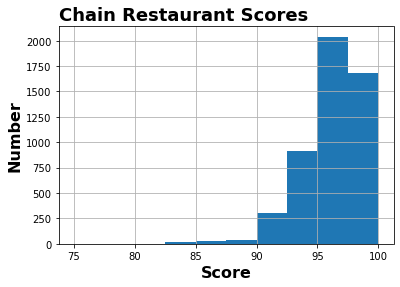

In [6]:
chain_df['score'].hist()
chain_scores = plt.gcf()
ax = plt.axes()
plt.title('Chain Restaurant Scores',fontsize=18, fontweight='bold', loc='left')
ax.set_xlabel('Score', fontsize=16, fontweight='bold')
ax.set_ylabel('Number', fontsize=16, fontweight='bold')

The histogram of all of the scores for every chain restaurant inspection is graphed above

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number')

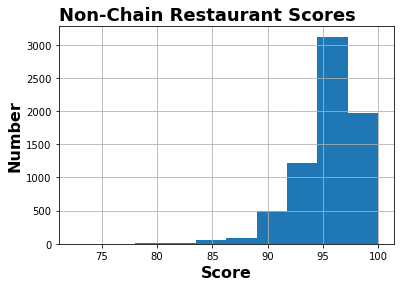

In [7]:
non_chain_df['score'].hist()
f2 = plt.gcf()
ax2 = plt.axes()
plt.title('Non-Chain Restaurant Scores',fontsize=18, fontweight='bold', loc='left')
ax2.set_xlabel('Score', fontsize=16, fontweight='bold')
ax2.set_ylabel('Number', fontsize=16, fontweight='bold')

The histogram of all of the scores for every non-chain restaurant inspection is graphed above

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Number')

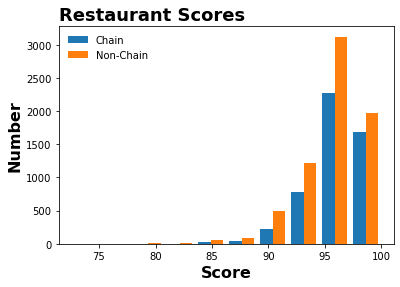

In [8]:
plt.hist([chain_df['score'], non_chain_df['score']], label=['Chain', 'Non-Chain'])
plt.title('Restaurant Scores',fontsize=18, fontweight='bold', loc='left')
plt.legend(loc='upper left', scatterpoints=1, frameon=False)
ax = plt.axes()
ax.set_xlabel('Score', fontsize=16, fontweight='bold')
ax.set_ylabel('Number', fontsize=16, fontweight='bold')

The histogram for both the chain and non-chain restaurants has been combined into one large comparison

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Percentage')

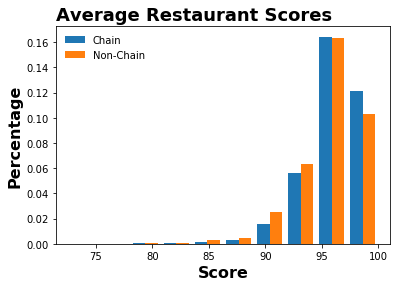

In [9]:
plt.hist([chain_df['score'], non_chain_df['score']], label=['Chain', 'Non-Chain'], density = True)
plt.title('Average Restaurant Scores',fontsize=18, fontweight='bold', loc='left')
plt.legend(loc='upper left', scatterpoints=1, frameon=False)
ax = plt.axes()
ax.set_xlabel('Score', fontsize=16, fontweight='bold')
ax.set_ylabel('Percentage', fontsize=16, fontweight='bold')

Here the height of each bar is the total number of each bin multiplied by the size of the bin over the total number of observations with both chain and non-chain restaurants graphed.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0, 0.5, 'Percentage')

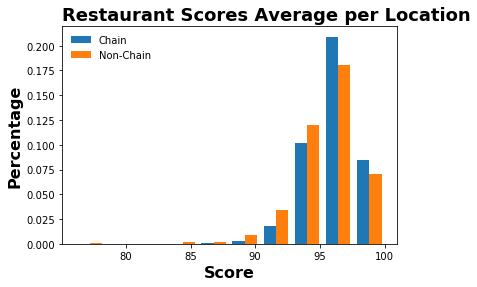

In [10]:
chain_df = chain_df[['hsisid', 'score']]
non_chain_df = non_chain_df[['hsisid', 'score']]
chain_df.groupby(['hsisid']).mean()[['score']]
plt.hist([chain_df.groupby(['hsisid']).mean()['score'], non_chain_df.groupby(['hsisid']).mean()['score']], label=['Chain', 'Non-Chain'], density = True)
plt.title('Restaurant Scores Average per Location',fontsize=18, fontweight='bold', loc='left')
plt.legend(loc='upper left', scatterpoints=1, frameon=False)
ax = plt.axes()
ax.set_xlabel('Score', fontsize=16, fontweight='bold')
ax.set_ylabel('Percentage', fontsize=16, fontweight='bold')

The histogram here graphs the average score of each location across all of its inspections, where the height of the bar is the percentage of occurrences of that average score relative to the total number of average scores for each location

In [11]:
print(chain_df['score'].mean(), "mean of all chain scores")
print(non_chain_df['score'].mean(), "mean of all non-chain scores")

print(chain_df.groupby(['hsisid']).mean()['score'].mean(), "mean of mean location chain scores")
print(non_chain_df.groupby(['hsisid']).mean()['score'].mean(), "mean of mean location non-chain scores")

95.9328090782401 mean of all chain scores
95.47278081011204 mean of all non-chain scores
96.04167579196887 mean of mean location chain scores
95.50230227873978 mean of mean location non-chain scores


# Results
The scores for each location for chain restaurants vs. non-chain restaurants did not very significantly, but there was a 0.5 average score difference between chain locations and non-chain locations. Non-chain locations did seem to have a overall higher number of inspections, most likely due to a longer history within the area than the corresponding chain locations. Chain restaurants also tended towards very strongly away from scores below 90 in the average per location suggesting that they likely had very strong course corrections away from 'B' ratings after recieving their grade. This could be due to corporate interference or management trying to course correct away from poor scores.

It is also possible that non-chain locations have to deal with higher risk food items and therefore have to work with stricter food handling requirements. A few of the non-chain locations included in the non-chain dataset are sushi restaurants which have to work with raw fish and have different expectations than a burger restaurant for example. Particulars of the preparation could also account for lower scores such as hand tossed pizza requiring extensive contact with many different raw ingredients.

# Privacy/Ethics Concerns
There are many privacy concerns in this data analysis since unique identifiers are required for the dataset to perform its analysis. The question asked carries many of the ethical concerns of this analysis since it is a direct reflection on food safety between two competing groups. This analysis could influence the spending habits of potential customers since the conclusion that chain restaurants have a slightly higher average food safety rating than non-chain restaurants could influnce customers into believing that chain restaurants have safer food. This study could also potentially highlight restaurants with poor food records that have changed management or practices to improve since it does not take into account improvement over time or the current state of the restaurant. This analysis also does not take into account the judging criterion of specific food inspectors and any tendancies they may have to mark a restaurant up or down. 

A higher food inspection score can also not be representative of the safety of the food overall since restaurants often prepare for health inspections and ensure that any poor practices may be covered up. The high average scores of ~95 for all of the restaurants sampled does not ensure that all food is safe to consume. Customers may be misled by the conculsion of this analysis since food safety concerns may not all be caught by the health inspectors. 
The data used may also not be representative of the whole world as well. Since health inspection mandates are set by local or state governments, there may be the possiblity that different standards were set for different restaurants. These different standards could have led to an uneven distribution of inspection scores between both chain and non-chain restaurants depending on location.  

I attempted to handle these concerns by leaving the HSISIDs out of the discussion as well as making a counterpoint to the observed results that the results of these safety inspections may not reflect the actual safety of the food that the consumer wishes to consume. I state that the customer should always use their best judgement in choosing what to eat and that food practices may also vary by region and could have an adverse affect on some rather than others. Foodborne illnesses are often spread by a single vector and little can be done to prevent outbreaks due to the responsiblity often being attributed to a single individual. For these reasons, the reader should keep up to date and be responsible in protecting themselves when it comes to food safety and restaurants. 

# Conclusion
There is a small difference between the average scores of chain restaurants vs. non-chain restaurants. As always, customers should exercise their best judgement when ordering food from a restaurant, but it seems that larger corporate control does allow for tigher control on food safety practices. The limitiations of this study were a lack of limits on both region and inspector. Since different regions have different food safety guidelines and different inspectors often tend towards different scores, variations in average scores could be due to these factors. The reasons why restaurants were marked down were also omitted, and depending on the inspector could be practice or safety related, leading to discrepancies between the score provided and the actual health risks of the business. It is hard to draw wider implications from this study due to the nature of business preparing for food safety inspections as well as the nature of foodbourne illnesses.